# **Trabajo de investigacion de Modelo predictivo SHAP**
# *SHAP(SHapley Additive exPlanations)*
El objetivo: 
* tomar un dataFrame de ejemplo 
* aplicar analisis de dato
* generar entrenamiento
* visualizacion de datos

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# from lime import lime_tabular
import warnings
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sys import path
import os
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import funtions

shap.initjs()
warnings.filterwarnings('ignore')


c:\Users\cutki\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
c:\Users\cutki\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.

../resources/allColProSol.xlsx
../resources/dataset_a_2021.csv
../resources/dataset_a_2021v1.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv
../resources/exitoFallidoEnviosProgramaSol.xlsx
../resources/exitoFallidoProgramaSol.xlsx
../resources/exitosoFallidosEnviosAllColProSol.xlsx
../resources/exitosoFallidosEnviosAllColSol.xlsx
../resources/exitososFallidosEnviosSol.xlsx
../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../resources/sinColCeroExitosoFallidosSol.xlsx
../resources/v2_hitosExitoFalloColESol1.csv


In [2]:
# Read and preview data
# df = pd.read_excel(open('../resources/Hito12sinColCeroExitosoFallidosSol.xlsx','rb'))
df = pd.read_csv("../resources/v2_hitosExitoFalloColESol1.csv", delimiter=";", skipinitialspace=True)

In [3]:
df.describe()

,hito1,hito2,exitosos,fallidos,e0,e1,e2,e3,e4,e5,...,e44,e45,e46,e47,e48,e49,e50,e51,e52,sol1
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.0,839.000000,839.000000,839.0,...,839.000000,839.0,839.0,839.0,839.0,839.0,839.0,839.0,839.0,839.000000
mean,13.353993,0.168057,7.476758,11.287247,0.505364,0.009535,0.0,0.352801,0.734207,0.0,...,0.010727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.642789
std,10.370917,1.929950,5.361101,8.432787,0.500269,0.097239,0.0,0.478126,0.442018,0.0,...,0.103076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.832625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
25%,3.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.200000
50%,13.000000,0.000000,7.000000,10.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.700000
75%,20.000000,0.000000,11.000000,16.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.100000
max,42.000000,32.000000,28.000000,47.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000


In [4]:
# Convertir la columna "sol1" a números de punto flotante
df['sol1'] = df['sol1'].astype(float)
df['exitosos'] = df['exitosos'].astype(int)
df['fallidos'] = df['fallidos'].astype(int)

print(df)

     hito1  hito2  exitosos  fallidos  e0  e1  e2  e3  e4  e5  ...  e44  e45  \
0     17.0    0.0        10        21   1   0   0   1   1   0  ...    0    0   
1     12.0    0.0         7         9   1   0   0   0   1   0  ...    0    0   
2     11.0    0.0         6        10   1   0   0   0   0   0  ...    0    0   
3      0.0    0.0         0         0   0   0   0   0   0   0  ...    0    0   
4      0.0    0.0         0         0   0   0   0   0   0   0  ...    0    0   
..     ...    ...       ...       ...  ..  ..  ..  ..  ..  ..  ...  ...  ...   
834   20.0    0.0        11         5   1   0   0   1   1   0  ...    0    0   
835   14.0    0.0         9         7   1   0   0   0   1   0  ...    0    0   
836   20.0    0.0        11        20   1   0   0   1   1   0  ...    0    0   
837   32.0    0.0        16        15   1   0   0   1   1   0  ...    0    0   
838    4.0    0.0         2        29   0   0   0   0   0   0  ...    0    0   

     e46  e47  e48  e49  e50  e51  e52 

In [5]:
#creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df['aprobado']=df.apply(lambda x: funtions.set_in_aprobado_nota(x['sol1']),axis = 1 )
#revisamos la existencia de la nueva columna.
print(df.columns)

Index(['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'sol1', 'aprobado'],
      dtype='object')


In [6]:
# verificar los valores en todas las columnas
student_array = df.to_numpy()

# Verificar si hay valores no finitos en el dataset
is_finite = np.isfinite(student_array)

print(is_finite)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [7]:
# Obtener los valores correspondientes donde is_finite es True
finite_values = student_array[is_finite]
print(finite_values)

[17.  0. 10. ...  0.  7.  1.]


In [8]:
# Verificar si hay valores NaN en el dataset
is_nan = np.isnan(student_array)
print(is_nan)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


# **Entrenamiento**
Preparando las coordenadas de análisis X/Y, donde utilizaremos la columna 'sol1' (notas) como referencia para el eje Y, y analizaremos el comportamiento de las demás columnas en relación a dicho eje X.

In [9]:
y = df['aprobado']
X = df[
    [
        "exitosos",
        "fallidos",
        "hito1",
        "hito2",
        "e0",
        "e1",
        "e3",
        "e4",
        "e6",
        "e7",
        "e9",
        "e10",
        "e11",
        "e12",
        "e13",
        "e17",
        "e18",
        "e21",
        "e22",
        "e23",
        "e25",
        "e26",
        "e28",
        "e29",
        "e32",
        "e35",
        "e37",
        "e38",
        "e42",
        "e44"
    ]
]

Se dividen los datos en un conjunto de entrenamiento (80% de los datos) y un conjunto de prueba (20% de los datos), y almacena esos conjuntos en las variables correspondientes. Esto es útil para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state= 1502)

Esto significa que el modelo explica aproximadamente el 2.20% de la variabilidad de los datos. Dicho de otra manera, el modelo no logra ajustarse bien a los datos y las características incluidas en el modelo tienen un poder explicativo limitado en relación con la variable objetivo.

# *Modelo de regresión con bosques aleatorios (Random Forest Regressor)*

+ `Random Forest Regressor` utiliza un conjunto de árboles de decisión construidos en base a subconjuntos aleatorios de características y datos de entrenamiento para realizar predicciones en problemas de regresión. La predicción final se obtiene al combinar las predicciones de cada árbol.
+ `random_state` se utiliza para establecer una semilla para el generador de números aleatorios. Esto asegura que los resultados sean reproducibles. En este caso, se establece en 1502.
+ `n_estimators` indica el número de árboles en el bosque aleatorio. En este caso, se establece en 200.

In [11]:
model = RandomForestRegressor(random_state= 1502, n_estimators=200)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=1502)

In [12]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

Si el RMSE es 0, significa que el modelo predice perfectamente los valores reales. Cuanto más cerca esté el MSE o RMSE de cero, mejor será el rendimiento del modelo en términos de la diferencia entre las predicciones y los valores reales.

In [13]:
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 0.2443679604601862


In [14]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.021973721493434906


In [15]:
#Generando explicacion interactiva.
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# *Visualizando entrenamiento*
+ `explainer.expected_value`: Esto representa el valor esperado de las predicciones del modelo. Es el valor base al que se le suma o se le resta la contribución de cada característica para obtener la predicción final.
+ `shap_values[0,:]`: Estos son los valores SHAP para una muestra en particular del conjunto de prueba. Estos valores representan la contribución de cada característica en la predicción para esa muestra específica.
+ `X_test.iloc[0,:]`: Esto corresponde a la primera muestra del conjunto de prueba (X_test). Representa los valores de las características para esa muestra.
+ `link='logit'`: Este parámetro especifica la función de enlace utilizada para transformar los valores SHAP. En este caso, se utiliza la función logística (logit) para mapear los valores SHAP a una escala interpretable.
+ `matplotlib=True`: Este parámetro indica que se utilizará la biblioteca Matplotlib para generar el gráfico de fuerza.

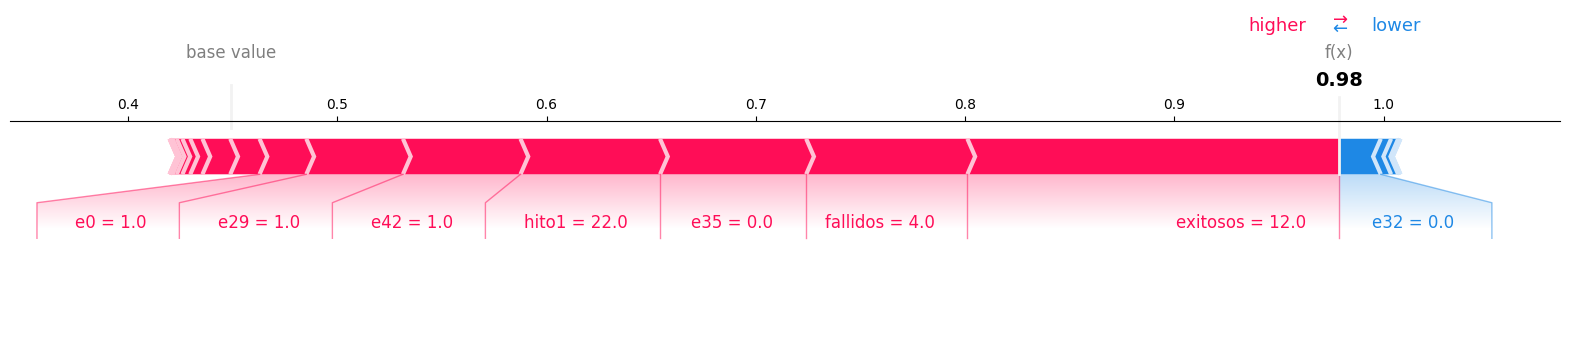

In [16]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], matplotlib=True)

In [17]:
shap.force_plot(explainer.expected_value, shap_values, X_test)


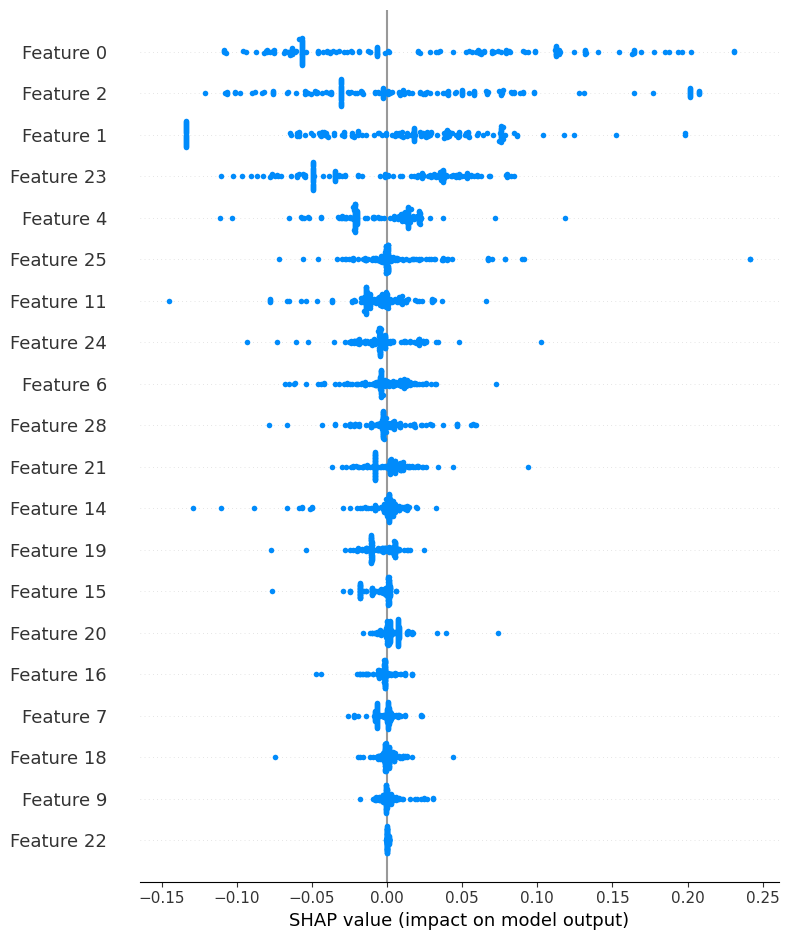

In [18]:
shap.summary_plot(shap_values)

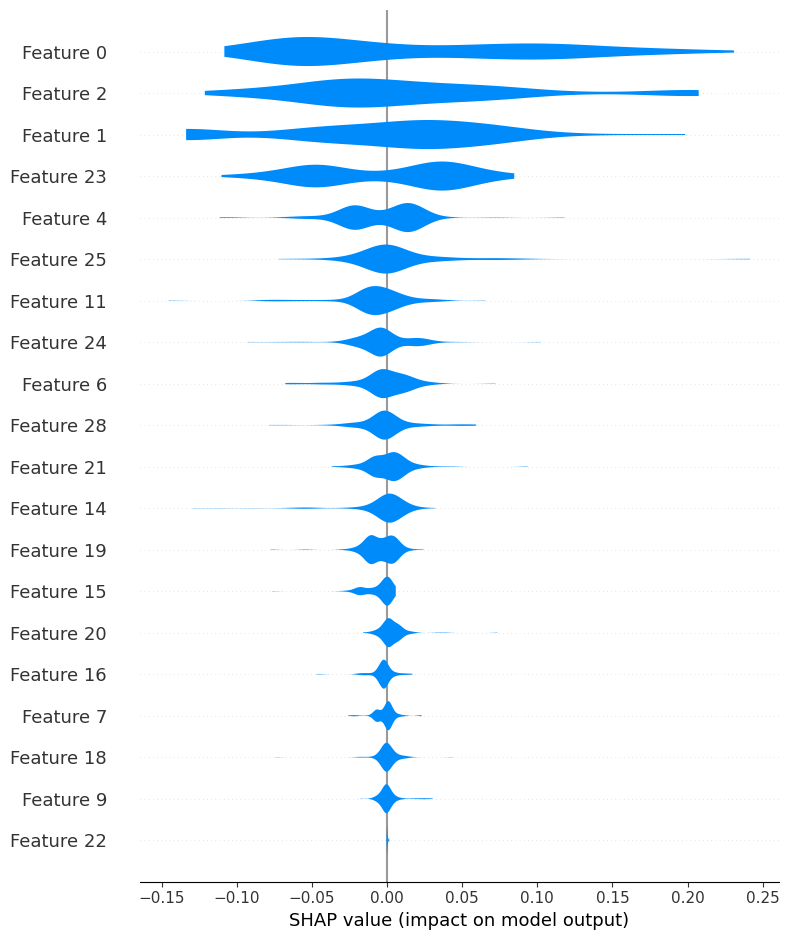

In [19]:
shap.summary_plot(shap_values, plot_type='violin')